1) Import all the packages needed for the python portion of this project

For this project we will be using: 
- pandas to store and handle data 
- numpy, Sckit-Learn, and statsmodels for statistical analysis and mathematical computations
- Matplotlib and Seaborn for Data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

2) Creating a pandas dataframe out of the Happiness and the alchohol consumption file and then joining the column from the alchohol column using the join statement

In [2]:
df_2019 = pd.read_csv('/Users/misaalsingh/Downloads/Full_Table.csv')
df_2019.columns = ['Year', 'Rank', 'Country', 'Happiness Score', 'GDP per Capita', 
                   'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 
                   'Corruption', 'Alcohol Consumption', 'Gas Emissions', 'Happy/NotHappy']
df_2019.pop('Generosity')
df_2019.pop('Rank')
df_2019

,Year,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Corruption,Alcohol Consumption,Gas Emissions,Happy/NotHappy
0,2019,Finland,7.769,1.340,1.587,0.986,0.596,0.393,10.78,51.30,Yes
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,10.26,34.23,Yes
2,2019,Norway,7.554,1.488,1.582,1.028,0.603,0.341,7.41,18.43,Yes
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,9.12,2.11,Yes
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,9.61,152.52,Yes
...,...,...,...,...,...,...,...,...,...,...,...
139,2019,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411,8.95,2.73,No
140,2019,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147,11.27,75.68,No
141,2019,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025,0.21,7.59,No
142,2019,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035,2.38,14.31,No


In [3]:
df_2019 = df_2019.fillna(6.165743055555556)
df_2019

,Year,Country,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Corruption,Alcohol Consumption,Gas Emissions,Happy/NotHappy
0,2019,Finland,7.769,1.340,1.587,0.986,0.596,0.393,10.78,51.30,Yes
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,10.26,34.23,Yes
2,2019,Norway,7.554,1.488,1.582,1.028,0.603,0.341,7.41,18.43,Yes
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,9.12,2.11,Yes
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,9.61,152.52,Yes
...,...,...,...,...,...,...,...,...,...,...,...
139,2019,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411,8.95,2.73,No
140,2019,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147,11.27,75.68,No
141,2019,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025,0.21,7.59,No
142,2019,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035,2.38,14.31,No


Running a simple linear regression and taking the regression summary to find the correlation of each column to happiness

Linear Regression: A model used to draw a linear correlation between 2 variables. 

Correlation: From this we can determine if there is a positive or negative correlation between two variables and we can determine the strength of this correlation

F-Statistics: Directly uses variances to measure the strenght that one variable's variance has on another variable. A higher F-Statistic can help us infer there is a effect that a explanatory variable has on a reponse variable. 

In [4]:
x = df_2019['GDP per Capita'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1754.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    3.63e-82
Time:                        00:01:54   Log-Likelihood:                         -264.26
No. Observations:                 144   AIC:                                      530.5
Df Residuals:                     143   BIC:                                      533.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3833      0.129     41.885      0.000       5.129       5.637
==============================================================================
Omnibus:                        5.855   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.669
Skew:                           0.436   Prob(JB):                       0.0587
Kurtosis:                       2.571   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of GDP to happiness is about .963 and the F-Statistic is about 1754. These metrics show that there is an effect of alcohol consumption on a country's happiness.

In [5]:
x = df_2019['Social Support'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              5975.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                   1.55e-118
Time:                        00:01:54   Log-Likelihood:                         -179.96
No. Observations:                 144   AIC:                                      361.9
Df Residuals:                     143   BIC:                                      364.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.3802      0.057     77.301      0.000       4.268       4.492
==============================================================================
Omnibus:                        8.670   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.649
Skew:                           0.387   Prob(JB):                      0.00487
Kurtosis:                       4.085   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Social Support to Happiness is .99 and the F-Statistic of the data is 5975. These metrics show that there is an effect of alcohol consumption on a country's happiness. 

In [6]:
x = df_2019['Life Expectancy'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              3972.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                   3.23e-106
Time:                        00:01:54   Log-Likelihood:                         -208.51
No. Observations:                 144   AIC:                                      419.0
Df Residuals:                     143   BIC:                                      422.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.0858      0.112     63.025      0.000       6.864       7.308
==============================================================================
Omnibus:                       11.979   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.864
Skew:                           0.613   Prob(JB):                      0.00161
Kurtosis:                       3.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Life Expectancy to Happiness is .979 and the F-Statistic of the data is 3972. These metrics show that there is an effect of alcohol consumption on a country's happiness. 

In [7]:
x = df_2019['Freedom'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              1573.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    4.85e-79
Time:                        00:01:54   Log-Likelihood:                         -271.50
No. Observations:                 144   AIC:                                      545.0
Df Residuals:                     143   BIC:                                      548.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            12.5789      0.317     39.657      0.000      11.952      13.206
==============================================================================
Omnibus:                        1.233   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.138
Skew:                           0.217   Prob(JB):                        0.566
Kurtosis:                       2.955   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Freedom to Happiness is .965 and the F-Statistic of the data is 1573. These metrics show that there is an effect of alcohol consumption on a country's happiness.  

In [8]:
x = df_2019['Corruption'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              255.7
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    1.20e-33
Time:                        00:01:54   Log-Likelihood:                         -376.58
No. Observations:                 144   AIC:                                      755.2
Df Residuals:                     143   BIC:                                      758.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            29.9952      1.876     15.991      0.000      26.287      33.703
==============================================================================
Omnibus:                       39.633   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.703
Skew:                          -1.288   Prob(JB):                     4.44e-16
Kurtosis:                       5.269   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Alcohol Consumption to Happiness is .82 and the F-Statistic of the data is 255.7. These metrics show that there is an effect of alcohol consumption on a country's happiness. 

In [9]:
x = df_2019['Gas Emissions'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              9.633
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                     0.00230
Time:                        00:01:54   Log-Likelihood:                         -445.71
No. Observations:                 144   AIC:                                      893.4
Df Residuals:                     143   BIC:                                      896.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0015      0.000      3.104      0.002       0.001       0.002
==============================================================================
Omnibus:                      161.002   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5573.158
Skew:                          -3.961   Prob(JB):                         0.00
Kurtosis:                      32.430   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Gas Emissions to Happiness is .25 and the F-Statistic of the data is 9. These metrics show that there is much less of a effect of alcohol consumption on a country's happiness. 

In [10]:
x = df_2019['Alcohol Consumption'].to_numpy().reshape(-1, 1)
y = df_2019['Happiness Score'].to_numpy().reshape(-1, 1)

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              420.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                    2.06e-44
Time:                        00:01:54   Log-Likelihood:                         -351.69
No. Observations:                 144   AIC:                                      705.4
Df Residuals:                     143   BIC:                                      708.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6451      0.031     20.502      0.000       0.583       0.707
==============================================================================
Omnibus:                        5.248   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.160
Skew:                          -0.159   Prob(JB):                        0.206
Kurtosis:                       2.348   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Correlation of Alcohol Consumption to Happiness is .86 and the F-Statistic of the data is 420. These metrics show that there is an effect of alcohol consumption on a country's happiness. 


3) Create a plot that visually shows a scatter plot with the line of best fit moving through it

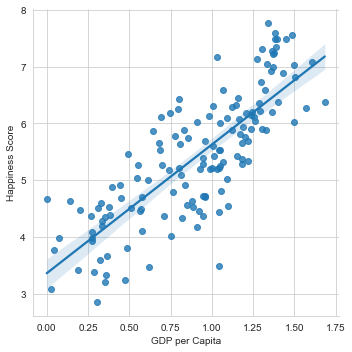

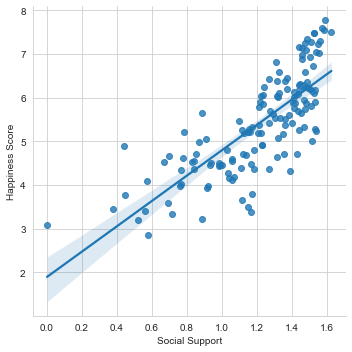

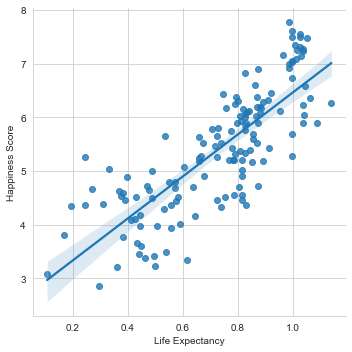

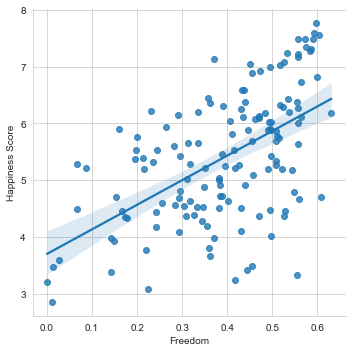

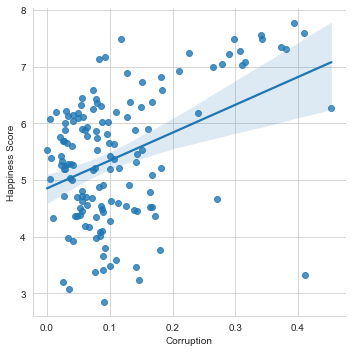

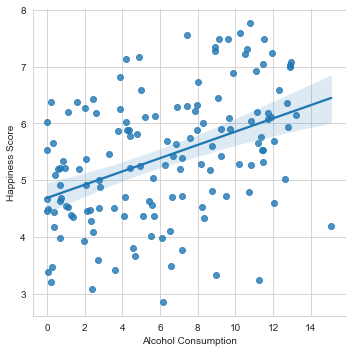

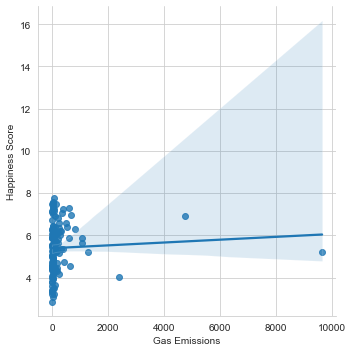

In [11]:
sns.set_style('whitegrid')

sns.lmplot(x ='GDP per Capita', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Social Support', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Life Expectancy', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Freedom', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Corruption', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Alcohol Consumption', y ='Happiness Score', data = df_2019)
sns.lmplot(x ='Gas Emissions', y ='Happiness Score', data = df_2019)

Creating a histogram to measure frequencies of data

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

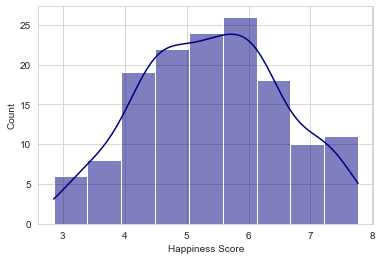

In [12]:
sns.histplot(data = df_2019
            ,x = 'Happiness Score'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='GDP per Capita', ylabel='Count'>

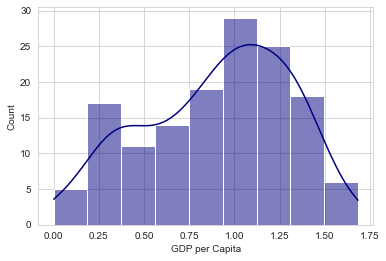

In [13]:
sns.histplot(data = df_2019
            ,x = 'GDP per Capita'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Social Support', ylabel='Count'>

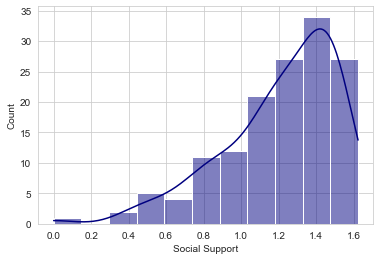

In [14]:
sns.histplot(data = df_2019
            ,x = 'Social Support'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Life Expectancy', ylabel='Count'>

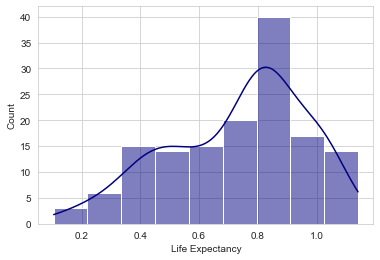

In [15]:
sns.histplot(data = df_2019
            ,x = 'Life Expectancy'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Freedom', ylabel='Count'>

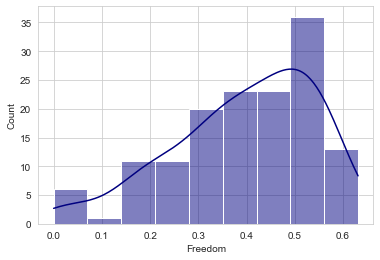

In [16]:
sns.histplot(data = df_2019
            ,x = 'Freedom'
            ,color = 'navy'
            ,kde = True
            )


<AxesSubplot:xlabel='Corruption', ylabel='Count'>

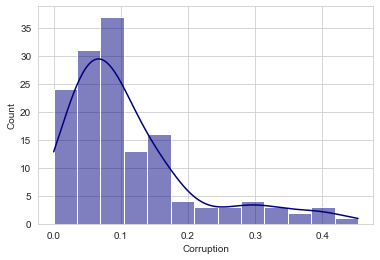

In [17]:
sns.histplot(data = df_2019
            ,x = 'Corruption'
            ,color = 'navy'
            ,kde = True
            )

<AxesSubplot:xlabel='Alcohol Consumption', ylabel='Count'>

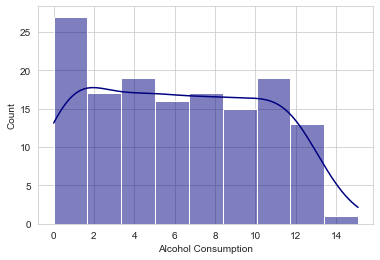

In [18]:
sns.histplot(data = df_2019
            ,x = 'Alcohol Consumption'
            ,color = 'navy'
            ,kde = True
            )

<AxesSubplot:xlabel='Gas Emissions', ylabel='Count'>

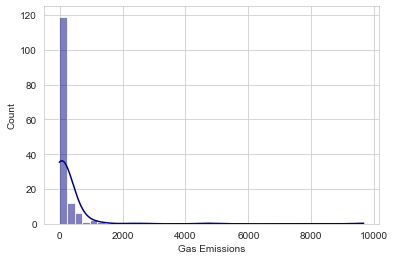

In [19]:
sns.histplot(data = df_2019
            ,x = 'Gas Emissions'
            ,color = 'navy'
            ,kde = True
            ,bins = 40
            )